In [23]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,TimeDistributed,Activation,LSTM,SimpleRNN
from keras.utils import np_utils     #to_categorical

In [24]:
import os

In [25]:
import tensorflow as tf

In [26]:
sample='hihello'


In [27]:
char_set=list(set(sample))

In [28]:
char_set

['l', 'i', 'e', 'h', 'o']

In [29]:
char_dic={w:i for i,w in enumerate(char_set)}

In [30]:
char_dic

{'l': 0, 'i': 1, 'e': 2, 'h': 3, 'o': 4}

In [31]:
x_str=sample[:-1]
y_str=sample[1:]

In [32]:
x_str

'hihell'

In [33]:
data_dim=len(char_set)
timesteps=len(y_str)  #과거데이터 갯수
num_classes=len(char_set)  #문자수


In [34]:
x=[char_dic[c] for c in x_str]
y=[char_dic[c] for c in y_str]


x=np_utils.to_categorical(x,num_classes=num_classes)
x=np.reshape(x,(-1,len(x),data_dim))
print(x.shape)

(1, 6, 5)


In [35]:
y=np_utils.to_categorical(y,num_classes=num_classes)
y=np.reshape(y,(-1,len(y),data_dim))


model=Sequential()
model.add(SimpleRNN(num_classes,input_shape=(timesteps,data_dim),return_sequences=True))   #num_classes=노드수

model.add(Dense(num_classes))   #노드수는 원핫의 갯수만큼 == 5
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))
model.summary()
#plot_model(model,to_file=os.path.baesname(__file__)+'png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 6, 5)              55        
_________________________________________________________________
dense_5 (Dense)              (None, 6, 5)              30        
_________________________________________________________________
time_distributed_3 (TimeDist (None, 6, 5)              30        
_________________________________________________________________
activation_3 (Activation)    (None, 6, 5)              0         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [39]:
y.shape

(1, 6, 5)

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [45]:
model.fit(x,y,epochs=10,batch_size=1)

Epoch 1/10
1/1 [==============================] - 0s 478ms/step - loss: 1.6109 - acc: 0.1667
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 1.6063 - acc: 0.1667
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 1.6016 - acc: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 1.5969 - acc: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 1.5922 - acc: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 1.5876 - acc: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 1.5829 - acc: 0.3333
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 1.5782 - acc: 0.3333
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 1.5736 - acc: 0.3333
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 1.5689 - acc: 0.3333


In [46]:
predictions=model.predict(x,verbose=0)

In [47]:
for i,prediction in enumerate(predictions):
    print(prediction)
    x_index=np.argmax(x[i],axis=1)
    x_str=[char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))   #실제값
    
    index=np.argmax(prediction,axis=1)
    result=[char_set[j] for j in index]
    print(index,''.join(result))  #예측값

[[0.21450779 0.14650124 0.2020647  0.26245657 0.17446972]
 [0.25608823 0.121477   0.20026852 0.32715893 0.09500736]
 [0.23569973 0.15440735 0.1947024  0.297712   0.1174785 ]
 [0.24019176 0.2247344  0.19610646 0.23993915 0.09902819]
 [0.24303459 0.18587153 0.19094531 0.22502936 0.1551192 ]
 [0.27309552 0.15382889 0.19768171 0.22132643 0.15406741]]
[3 1 3 2 0 0] hihell
[3 3 3 0 0 0] hhhlll


# 주식


주식데이터

최근데이터가 위로올라와있음

1.sort

2.어떤모양? 

3.단위  표준화

4.모양 reshape

5훈련

6아웃풋은 실제단위로

7rmse, mse로  단위맞는지

8시각화

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib
import os

tf.set_random_seed(777)

import matplotlib.pyplot as plt



In [58]:
seq_length=7 #과거 7개내역
data_dim=5 #데이터 5개(oepn,hign,low,volume,close)
hidden_dim=10
output_dim=1  #y가 한개가 나오도록 지정
learning_rate=0.01
iteratioins=500   #epoch

xy1=np.loadtxt('data-02-stock_daily.csv''',delimiter=',')
xy1=xy[::-1]   #역순으로 뒤집기  == sort
min1=np.min(xy1,0)   # 0=axis  (행방향,수직방향)
max1=np.max(xy1,0)

In [55]:
xy=(xy1-min1)/(max1-min1)

In [57]:
xy[1]

array([0.19393503, 0.20364193, 0.20866457, 0.00298467, 0.19655155])

In [67]:
x=xy
y0=xy[:,-1]   
y=xy[:,[-1]]
dataX=[]
dataY=[]
for i in range(0,len(y)-seq_length):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    #print(_x,'->',_y)
    dataX.append(_x)
    dataY.append(_y)
dataX[0]   #쉐이프 확인
train_size=int(len(dataY)*0.7)
test_size=len(dataY)-train_size
trainX,testX=np.array(dataX[0:train_size]),np.array(dataX[train_size:len(dataX)])
trainY,testY=np.array(dataY[0:train_size]),np.array(dataY[train_size:len(dataY)])

array([0.1920924 , 0.19655155, 0.18774973, 0.21744815, 0.21698189,
       0.22496747, 0.14744274, 0.13289962, 0.18171679, 0.2086465 ,
       0.14106001, 0.11089532, 0.11649107, 0.12791587, 0.18649648,
       0.12692483, 0.10512477, 0.12316526, 0.10022843, 0.09504062,
       0.06886882, 0.07169585, 0.10244347, 0.09941237, 0.11308129,
       0.10311379, 0.102764  , 0.06583772, 0.05074084, 0.05377184,
       0.07630073, 0.1089136 , 0.11815244, 0.0993833 , 0.07994365,
       0.08183815, 0.10582417, 0.1084764 , 0.13520206, 0.15303849,
       0.17530499, 0.21392171, 0.20147697, 0.19681376, 0.19626009,
       0.17888975, 0.1526887 , 0.15187264, 0.17880235, 0.18588448,
       0.2027593 , 0.19818349, 0.19319974, 0.17137043, 0.17256536,
       0.1507653 , 0.14706388, 0.17725764, 0.18171679, 0.18597188,
       0.21100727, 0.21004549, 0.2509354 , 0.24321202, 0.24682604,
       0.24111364, 0.26265149, 0.26167525, 0.26865535, 0.26142749,
       0.22890203, 0.24344515, 0.2289311 , 0.25248011, 0.26906

In [78]:
y

array([[0.1920924 ],
       [0.19655155],
       [0.18774973],
       [0.21744815],
       [0.21698189],
       [0.22496747],
       [0.14744274],
       [0.13289962],
       [0.18171679],
       [0.2086465 ],
       [0.14106001],
       [0.11089532],
       [0.11649107],
       [0.12791587],
       [0.18649648],
       [0.12692483],
       [0.10512477],
       [0.12316526],
       [0.10022843],
       [0.09504062],
       [0.06886882],
       [0.07169585],
       [0.10244347],
       [0.09941237],
       [0.11308129],
       [0.10311379],
       [0.102764  ],
       [0.06583772],
       [0.05074084],
       [0.05377184],
       [0.07630073],
       [0.1089136 ],
       [0.11815244],
       [0.0993833 ],
       [0.07994365],
       [0.08183815],
       [0.10582417],
       [0.1084764 ],
       [0.13520206],
       [0.15303849],
       [0.17530499],
       [0.21392171],
       [0.20147697],
       [0.19681376],
       [0.19626009],
       [0.17888975],
       [0.1526887 ],
       [0.151

In [79]:
model3=tf.keras.models.Sequential()
model3.add(tf.keras.layers.LSTM(10,input_shape=(7,5)))
model3.add(tf.keras.layers.Dense(1))
optimizer=tf.train.AdamOptimizer(0.01)
model3.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mean_absolute_error','mean_squared_error'])
model3.fit(trainX,trainY,epochs=100)


Epoch 1/100
507/507 [==============================] - 1s 1ms/sample - loss: 0.0254 - mean_absolute_error: 0.1181 - mean_squared_error: 0.0254
Epoch 2/100
507/507 [==============================] - 0s 439us/sample - loss: 0.0050 - mean_absolute_error: 0.0518 - mean_squared_error: 0.0050
Epoch 3/100
507/507 [==============================] - 0s 415us/sample - loss: 0.0024 - mean_absolute_error: 0.0343 - mean_squared_error: 0.0024
Epoch 4/100
507/507 [==============================] - 0s 419us/sample - loss: 0.0020 - mean_absolute_error: 0.0316 - mean_squared_error: 0.0020
Epoch 5/100
507/507 [==============================] - 0s 427us/sample - loss: 0.0018 - mean_absolute_error: 0.0295 - mean_squared_error: 0.0018
Epoch 6/100
507/507 [==============================] - 0s 425us/sample - loss: 0.0017 - mean_absolute_error: 0.0281 - mean_squared_error: 0.0017
Epoch 7/100
507/507 [==============================] - 0s 439us/sample - loss: 0.0018 - mean_absolute_error: 0.0290 - mean_squared_e

In [80]:
model3.evaluate(testX,testY)

218/218 [==============================] - 0s 1ms/sample - loss: 6.6171e-04 - mean_absolute_error: 0.0196 - mean_squared_error: 6.6171e-04


[0.0006617108464599886, 0.019567035, 0.0006617108]

In [91]:
pred=model3.predict(testX)

In [83]:
len(x),len(model3.predict(testX))

(732, 218)

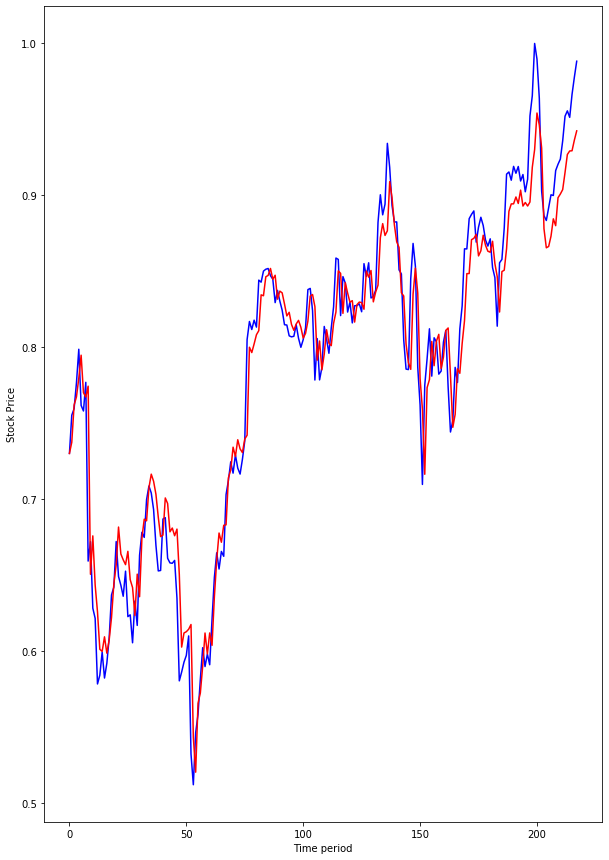

In [93]:
testY1=(testY*(max1[-1]-min1[-1]))+min1[-1]
pred1=(pred*(max1[-1]-min1[-1]))+min1[-1]

plt.figure(figsize=(10,15))
plt.plot(testY1,c='blue')
plt.plot(pred1,c='red')
plt.xlabel('Time period')
plt.ylabel('Stock Price')
plt.show()

# 강수량

In [157]:
raw=np.loadtxt('20190722164855.csv',delimiter=',',skiprows=1,dtype=object)

In [158]:
raw

array([['108', '2018-07-22 01:00', '27.3', ..., '.8', '60', '24.6'],
       ['108', '2018-07-22 02:00', '26.8', ..., '.6', '63', '24'],
       ['108', '2018-07-22 03:00', '26.3', ..., '.2', '63', '23.8'],
       ...,
       ['108', '2019-07-20 22:00', '28.4', ..., '1.8', '62', '26.9'],
       ['108', '2019-07-20 23:00', '28.2', ..., '1.9', '63', '26.7'],
       ['108', '2019-07-21 00:00', '26.9', ..., '1.6', '78', '26']],
      dtype=object)

In [168]:
data=np.nan_to_num(data,'0')

In [178]:
for i in range(len(data)):
    if data[i][1]=='':
        data[i][1]='0'
        

['27.3' '0' '.8' '60' '24.6']
['26.8' '0' '.6' '63' '24']
['26.3' '0' '.2' '63' '23.8']
['25.9' '0' '.3' '71' '23.4']
['25.5' '0' '.4' '72' '23.2']
['25.3' '0' '.6' '73' '23.5']
['25.8' '0' '.9' '67' '24.9']
['27.9' '0' '.6' '60' '29.4']
['30.5' '0' '.9' '54' '37.6']
['32.2' '0' '.8' '50' '45.4']
['33.8' '0' '1.9' '45' '51.5']
['35.5' '0' '1.9' '39' '56.6']
['36.7' '0' '1.8' '33' '60']
['37.4' '0' '2.3' '34' '58.5']
['37.5' '0' '2' '33' '56.9']
['37.8' '0' '2.5' '31' '56']
['37.6' '0' '2.1' '33' '50.8']
['36.3' '0' '3' '35' '41.1']
['34.5' '0' '2.8' '47' '36.4']
['33.3' '0' '2.3' '50' '33']
['32.3' '0' '1.7' '50' '30.9']
['31.7' '0' '1.4' '51' '30.1']
['31.2' '0' '1.5' '52' '29.2']
['30.6' '0' '2.3' '50' '29']
['30' '0' '1.5' '52' '28.7']
['29.7' '0' '1.4' '53' '28.3']
['29.6' '0' '2.1' '50' '28.1']
['29.3' '0' '.9' '51' '28']
['29.3' '0' '1.6' '55' '27.7']
['29.2' '0' '1.7' '58' '27.5']
['29.3' '0' '.8' '58' '29.4']
['30' '0' '.9' '56' '32.4']
['31' '0' '1.5' '55' '38.2']
['31.8' '0' 

['21.6' '0' '1' '37' '21.7']
['20.3' '0' '.6' '39' '19.2']
['19.3' '0' '.4' '45' '18']
['18.5' '0' '1' '48' '16.8']
['17.7' '0' '1' '52' '16']
['17.4' '0' '1.2' '49' '15.4']
['17' '0' '1.5' '51' '14.9']
['16.6' '0' '1.7' '53' '14.9']
['16.6' '0' '1.5' '54' '15.1']
['16.5' '0' '1.6' '57' '15.1']
['16.4' '0' '1.7' '59' '15']
['16.3' '0' '1.5' '61' '15']
['16.3' '0' '2.1' '62' '15']
['16.3' '0' '2' '62' '15.3']
['16.7' '0' '2' '60' '16.5']
['17.7' '0' '1.8' '54' '18.6']
['19.4' '0' '2.3' '47' '22.7']
['20.5' '0' '2.1' '42' '25.9']
['22.5' '0' '1.8' '37' '33.1']
['23.4' '0' '2.1' '34' '36.7']
['24.1' '0' '1.3' '33' '36.6']
['24.7' '0' '1.2' '35' '35.9']
['24.4' '0' '1.8' '35' '32.8']
['23.6' '0' '1.4' '38' '26.5']
['22.1' '0' '1.5' '45' '21.9']
['20.7' '0' '1' '46' '19.6']
['20' '0' '2' '46' '18.7']
['18.9' '0' '2' '43' '17.4']
['18.1' '0' '1.7' '43' '16.5']
['17.4' '0' '2.1' '46' '15.8']
['16.7' '0' '1.7' '50' '15.2']
['16.1' '0' '1.4' '53' '14.7']
['15.7' '0' '1.4' '53' '14.3']
['14.9' '

['-10.4' '0' '1.5' '20' '-7.2']
['-8.9' '0' '4' '22' '-3.4']
['-7.7' '0' '2.8' '23' '-.2']
['-6.5' '0' '2.7' '23' '1.1']
['-4.8' '0' '3.5' '24' '2.9']
['-4.9' '0' '4.5' '25' '1.8']
['-4.5' '0' '3.9' '24' '.4']
['-4.8' '0' '3.9' '27' '-.5']
['-5.8' '0' '2.9' '33' '-1.9']
['-6.5' '0' '2.5' '39' '-3.9']
['-6.8' '0' '2.8' '40' '-5.2']
['-7.5' '0' '1.9' '43' '-6']
['-7.9' '0' '2.8' '46' '-6.6']
['-8.4' '0' '4' '48' '-7']
['-9.2' '0' '1.2' '48' '-7.4']
['-9.7' '0' '2.4' '46' '-7.9']
['-10.1' '0' '3.1' '33' '-8.3']
['-10.5' '0' '1.8' '34' '-8.6']
['-10.6' '0' '1.8' '31' '-8.9']
['-10.9' '0' '1' '29' '-9.1']
['-11.3' '0' '1.2' '31' '-9.3']
['-11.5' '0' '2.2' '31' '-9.4']
['-11' '0' '1.4' '32' '-9.5']
['-11.7' '0' '1.4' '30' '-9.4']
['-10.9' '0' '1.7' '27' '-7.8']
['-8.7' '0' '2.1' '25' '-3.4']
['-6.1' '0' '1.1' '23' '0']
['-5.7' '0' '2' '22' '1.9']
['-3.4' '0' '2' '19' '4.3']
['-2.9' '0' '1.9' '17' '3.9']
['-2.6' '0' '3.3' '19' '1.4']
['-3' '0' '3.1' '20' '-.1']
['-4.1' '0' '3.1' '22' '-.7']
[

['.1' '.3' '1.6' '73' '.1']
['.3' '0' '2.6' '75' '2.9']
['.7' '0' '1.8' '80' '2.9']
['.6' '0' '1.9' '76' '.3']
['.5' '0' '1.9' '81' '.1']
['.4' '0' '1.9' '88' '0']
['.7' '.5' '1.3' '93' '0']
['.7' '0' '2.8' '79' '0']
['-.2' '0' '3.4' '72' '0']
['-.7' '0' '3.2' '71' '-.1']
['-1.2' '0' '2.7' '75' '-.1']
['-1.9' '0' '2.3' '73' '-.4']
['-2.3' '0' '2' '70' '-.7']
['-2.5' '0' '3.3' '68' '-.7']
['-2.9' '0' '2' '69' '-.8']
['-3.2' '.2' '2.1' '73' '-.9']
['-3.5' '0' '1.9' '72' '-1']
['-3.7' '0' '1.7' '67' '-1.5']
['-4.3' '0' '1.5' '70' '-2.3']
['-4.8' '0' '2.8' '72' '-2.8']
['-5' '0' '1.9' '73' '-2.8']
['-5' '0' '3' '67' '-2.2']
['-4.1' '0' '2.5' '62' '-.3']
['-2.9' '0' '3.3' '57' '.2']
['-1.7' '0' '2.9' '53' '6.8']
['-.9' '0' '3.2' '51' '6.6']
['-.1' '0' '3.6' '44' '10.3']
['.5' '0' '2.4' '43' '9.9']
['1.5' '0' '2.6' '38' '7.5']
['.3' '0' '3.3' '44' '2']
['-.9' '0' '3' '55' '0']
['-1.6' '0' '2.3' '57' '-.8']
['-2' '0' '1.6' '60' '-1.6']
['-2.5' '0' '2.6' '51' '-2.4']
['-3.1' '0' '2.7' '50' '-3

['16' '0' '.4' '61' '12.8']
['15.3' '0' '.2' '64' '12']
['15.6' '0' '.7' '58' '13.7']
['17.9' '0' '1.5' '48' '16.2']
['20.4' '0' '.6' '42' '23']
['22.1' '0' '.8' '41' '26.9']
['23.9' '0' '1.9' '41' '31.2']
['25.1' '0' '1' '39' '33.7']
['25' '0' '1.4' '40' '29.2']
['25.3' '0' '.7' '38' '28.2']
['25.3' '0' '1.7' '39' '27.3']
['24.7' '0' '2.6' '42' '26.9']
['24.4' '0' '1.9' '44' '24.7']
['23.3' '0' '2' '50' '22']
['21.1' '0' '3.1' '56' '19.8']
['19.8' '0' '1.8' '58' '18.4']
['19' '0' '2.6' '60' '17.6']
['18.7' '0' '1.5' '60' '17']
['18.3' '0' '1.4' '62' '16.6']
['18' '0' '1.4' '64' '16.2']
['17.6' '0' '1' '67' '15.9']
['16.8' '.9' '.7' '85' '15.4']
['16.5' '1.7' '.5' '94' '15.2']
['16.2' '.7' '.4' '95' '15.1']
['16' '.6' '.3' '95' '15']
['15.8' '.2' '.6' '96' '14.9']
['16.1' '0' '1' '96' '15.7']
['16.5' '0' '1' '95' '17.2']
['17.2' '0' '.2' '82' '19.1']
['19' '0' '.8' '74' '22.9']
['19.3' '0' '3.3' '73' '25.7']
['21.6' '0' '1.5' '62' '30.3']
['23.3' '0' '1.2' '54' '31']
['24.5' '0' '3.4' 

['25.3' '0' '1.4' '71' '29.4']
['25.3' '0' '2.2' '70' '29.7']
['26.1' '0' '1.1' '65' '35.9']
['28' '0' '2.2' '58' '42.1']
['28.6' '0' '2.6' '56' '40.5']
['27.6' '0' '3.1' '58' '34.5']
['26.3' '0' '2.9' '62' '29.9']
['25.6' '0' '2.3' '67' '26.8']
['24.7' '0' '2.5' '71' '25.4']
['23.8' '0' '2.7' '70' '24.3']
['23.4' '0' '1.9' '60' '23.5']
['23.1' '0' '2.2' '53' '22.7']
['22.3' '0' '1.3' '65' '21.4']
['21.7' '.1' '.6' '69' '20.9']
['21.1' '.2' '.6' '81' '20.7']
['20.8' '.2' '.5' '84' '20.6']
['20.7' '0' '.1' '82' '20.7']
['20.3' '.5' '1.2' '87' '20.4']
['19.9' '0' '1.2' '85' '20.3']
['19.8' '.1' '.8' '83' '20.4']
['19.7' '.4' '.8' '92' '21.2']
['19.9' '0' '1' '90' '21.9']
['20.2' '0' '1.1' '85' '22.7']
['21' '0' '1.3' '79' '24.4']
['23.7' '0' '1.8' '69' '32.3']
['25.4' '0' '1.8' '63' '36']
['26.3' '0' '1.3' '58' '34.8']
['26.2' '0' '1.6' '57' '32.1']
['26.6' '0' '1.7' '46' '33.5']
['27.2' '0' '1.5' '52' '33.6']
['26.8' '0' '1.2' '57' '30']
['26.1' '0' '1.2' '59' '27.1']
['25.5' '0' '.9' '

In [186]:
len(data),len(data[0])

(8736, 5)

In [221]:
for k in range(len(data)):
    for i in range(len(data[0])):
        #print(data[k][i])
        if data[k][i]=='':
            data[k][i]='0'
        data[k][i]=float(data[k][i])

In [222]:
data[0][0]=float(data[0][0])

In [223]:
data

array([[26.8, 0.0, 0.6, 63.0, 24.0],
       [26.3, 0.0, 0.2, 63.0, 23.8],
       [25.9, 0.0, 0.3, 71.0, 23.4],
       ...,
       [28.4, 0.0, 1.8, 62.0, 26.9],
       [28.2, 0.0, 1.9, 63.0, 26.7],
       [26.9, 0.0, 1.6, 78.0, 26.0]], dtype=object)

In [161]:
data.astype(np.float3da)

ValueError: could not convert string to float: 

In [164]:
data[0][1]

''

In [165]:
data.astype(np.float32)

ValueError: could not convert string to float: 

In [118]:
raw

array([['지점', '일시', '기온(°C)', ..., '풍속(m/s)', '습도(%)', '지면온도(°C)'],
       ['108', '2018-07-22 01:00', '27.3', ..., '.8', '60', '24.6'],
       ['108', '2018-07-22 02:00', '26.8', ..., '.6', '63', '24'],
       ...,
       ['108', '2019-07-20 22:00', '28.4', ..., '1.8', '62', '26.9'],
       ['108', '2019-07-20 23:00', '28.2', ..., '1.9', '63', '26.7'],
       ['108', '2019-07-21 00:00', '26.9', ..., '1.6', '78', '26']],
      dtype=object)

In [219]:
data=raw[1:,2:]

In [220]:
data

array([['26.8', '', '.6', '63', '24'],
       ['26.3', '', '.2', '63', '23.8'],
       ['25.9', '', '.3', '71', '23.4'],
       ...,
       ['28.4', '', '1.8', '62', '26.9'],
       ['28.2', '', '1.9', '63', '26.7'],
       ['26.9', '0', '1.6', '78', '26']], dtype=object)

In [197]:
x=data
y=data[:,[2]]

In [226]:
for i in range(5):
    x[:,i]=(x[:,i]-np.min(x[:,i],0))/(np.max(x[:,i],0)-np.min(x[:,i],0))

In [215]:
np.max(x[:,0],0)

39.4

In [227]:
x

array([[0.7742537313432836, 0.0, 0.11428571428571421, 0.5681818181818181,
        0.4850136239782017],
       [0.7649253731343284, 0.0, 0.08571428571428563, 0.6022727272727273,
        0.47683923705722076],
       [0.7555970149253731, 0.0, 0.02857142857142858, 0.6022727272727273,
        0.47411444141689385],
       ...,
       [0.7947761194029851, 0.0, 0.2571428571428571, 0.5909090909090908,
        0.5163487738419619],
       [0.7910447761194029, 0.0, 0.27142857142857146, 0.6022727272727273,
        0.5136239782016349],
       [0.7667910447761194, 0.0, 0.22857142857142854, 0.7727272727272727,
        0.5040871934604905]], dtype=object)

In [144]:
len(data[0])

5

In [231]:
seq_length=10
data_dim=5
hidden_dim=10
output_dim=1
learning_rate=0.01
iteratioins=500
dataX=[]
dataY=[]
for i in range(0,len(y)-10):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    dataX.append(_x)
    dataY.append(_y)
    
train_size=int(len(dataY)*0.7)
test_size=int(len(dataY))-train_size
trainX,testX=np.array(dataX[:train_size]),np.array(dataX[train_size:])
trainY=np.array(dataY[:train_size])
testY=np.array(dataY[train_size:])



trainX.shape,trainY.shape


((6108, 10, 5), (6108, 1))

In [234]:
model4=tf.keras.models.Sequential()
model4.add(tf.keras.layers.LSTM(10,input_shape=(10,5),return_sequences=True))  #리턴시퀀스=이구조가 그대로다음구조로 가게
model4.add(tf.keras.layers.LSTM(10))
model4.add(tf.keras.layers.Dense(1))
optimizer=tf.train.AdadeltaOptimizer(0.01)
model4.compile(loss='mean_squared_error',optimizer=optimizer,
              metrics=['mean_absolute_error','mean_squared_error']
              )

model4.fit(trainX,trainY,epochs=100)

Epoch 1/100
6108/6108 [==============================] - 10s 2ms/sample - loss: 3.9732 - mean_absolute_error: 1.7080 - mean_squared_error: 3.9732
Epoch 2/100
6108/6108 [==============================] - 9s 1ms/sample - loss: 3.9300 - mean_absolute_error: 1.6955 - mean_squared_error: 3.9300
Epoch 3/100
6108/6108 [==============================] - 9s 1ms/sample - loss: 3.8826 - mean_absolute_error: 1.6817 - mean_squared_error: 3.8826
Epoch 4/100
6108/6108 [==============================] - 9s 2ms/sample - loss: 3.8312 - mean_absolute_error: 1.6665 - mean_squared_error: 3.8312
Epoch 5/100
6108/6108 [==============================] - 9s 2ms/sample - loss: 3.7754 - mean_absolute_error: 1.6498 - mean_squared_error: 3.7754
Epoch 6/100
6108/6108 [==============================] - 10s 2ms/sample - loss: 3.7145 - mean_absolute_error: 1.6315 - mean_squared_error: 3.7145
Epoch 7/100
6108/6108 [==============================] - 10s 2ms/sample - loss: 3.6477 - mean_absolute_error: 1.6112 - mean_squa